In [1]:
import librosa
from scipy.io import wavfile as wav
import numpy as np

filename = './dataset_forest/audio/fold6/111048-6-0-0.wav'

librosa_audio, librosa_sample_rate = librosa.load(filename)
scipy_sample_rate, scipy_audio = wav.read(filename)

print('Original sample rate:', scipy_sample_rate)
print('Librosa sample rate:', librosa_sample_rate)

Original sample rate: 22050
Librosa sample rate: 22050


In [2]:
print('Original audio file min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))
print('Librosa audio file min~max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

Original audio file min~max range: -32768 to 32767
Librosa audio file min~max range: -1.0 to 0.9999695


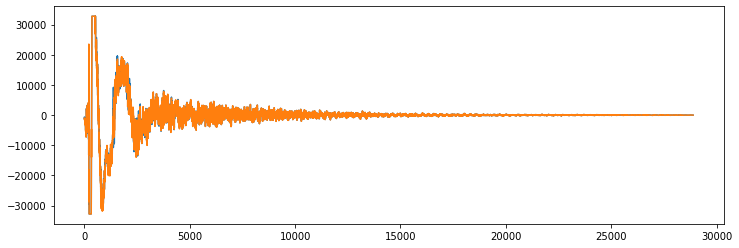

In [3]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

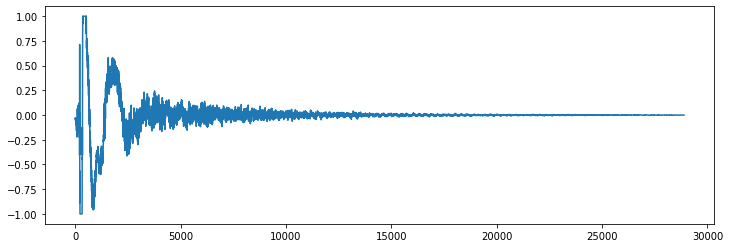

In [4]:
# Librosa audio with channels merged (max value)
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio)

In [5]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 57)


<AxesSubplot:xlabel='Time'>

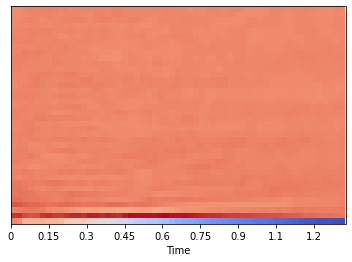

In [6]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

In [7]:
def extract_features(file_name):

    try:
        audio, sample_rate = librosa.load(file_name)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)

    except Exception as e:
        print("Error encountered while parsing file: ", file_name, e)
        return None

    return mfccsscaled

In [8]:
# Load various imports
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset
fulldatasetpath = './dataset_forest/audio/'

metadata = pd.read_csv('./dataset_forest/metadata/dataset_forest.csv')

features = []

# Iterate through each sound file and extract the features
for index, row in metadata.iterrows():

    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))

    class_label = row["class"]
    data = extract_features(file_name)

    features.append([data, class_label])

# Convert into a Panda dataframe
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

Finished feature extraction from  4374  files


In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))
np.save('saved_models/classes.npy', le.classes_)

In [10]:
# split the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [11]:
### store the preprocessed data for use in the next notebook

%store x_train
%store x_test
%store y_train
%store y_test
%store yy
%store le

Stored 'x_train' (ndarray)
Stored 'x_test' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'yy' (ndarray)
Stored 'le' (LabelEncoder)


In [12]:
input()

'1'